<a href="https://www.kaggle.com/code/game1g/weather?scriptVersionId=217090057" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
data = pd.read_csv('/kaggle/input/global-weather-repository/GlobalWeatherRepository.csv')
# 檢查數據集的基本資訊
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46382 entries, 0 to 46381
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       46382 non-null  object 
 1   location_name                 46382 non-null  object 
 2   latitude                      46382 non-null  float64
 3   longitude                     46382 non-null  float64
 4   timezone                      46382 non-null  object 
 5   last_updated_epoch            46382 non-null  int64  
 6   last_updated                  46382 non-null  object 
 7   temperature_celsius           46382 non-null  float64
 8   temperature_fahrenheit        46382 non-null  float64
 9   condition_text                46382 non-null  object 
 10  wind_mph                      46382 non-null  float64
 11  wind_kph                      46382 non-null  float64
 12  wind_degree                   46382 non-null  int64  
 13  w

In [2]:
X = data[['air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'temperature_celsius', 'humidity']]  # 替換特徵
y = data['air_quality_PM2.5']  # 目標變數

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [5]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [6]:
from sklearn.metrics import mean_squared_error

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("均方誤差 (MSE):", mse)

均方誤差 (MSE): 1147.7152962644436


In [7]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
print("隨機森林均方誤差 (MSE):", mse_rf)

隨機森林均方誤差 (MSE): 611.0375364812019


In [8]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_
print("最佳參數:", grid_search.best_params_)

最佳參數: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}


In [9]:
#安裝中文字體
!apt-get install -y fonts-noto-cjk




Suggested packages:
  fonts-noto-cjk-extra
The following NEW packages will be installed:
  fonts-noto-cjk
0 upgraded, 1 newly installed, 0 to remove and 132 not upgraded.
Need to get 61.2 MB of archives.
After this operation, 93.2 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 fonts-noto-cjk all 1:20220127+repack1-1 [61.2 MB]
Fetched 61.2 MB in 1s (61.2 MB/s)
Selecting previously unselected package fonts-noto-cjk.
(Reading database ... 127365 files and directories currently installed.)
Preparing to unpack .../fonts-noto-cjk_1%3a20220127+repack1-1_all.deb ...
Unpacking fonts-noto-cjk (1:20220127+repack1-1) ...
Setting up fonts-noto-cjk (1:20220127+repack1-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23526 (\N{CJK UNIFIED IDEOGRAPH-5BE6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 28204 (\N{CJK UNIFIED IDEOGRAPH-6E2C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20540 (\N{CJK UNIFIED IDEOGRAPH-503C}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35430 (\N{CJK UNIFIED IDEOGRAPH-8A66}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20013 (\N{CJK UNIFIED IDEOGRAPH-4E2D}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/

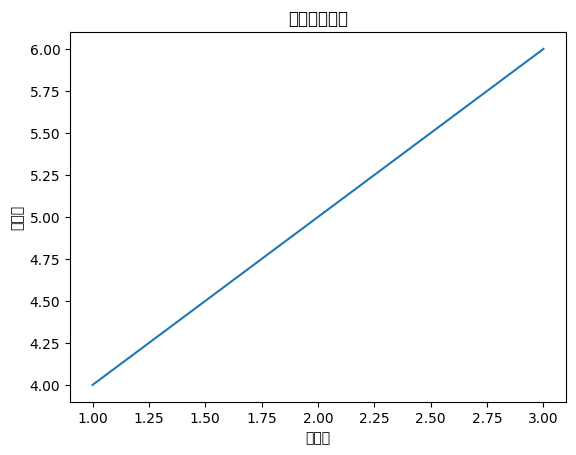

In [10]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.sans-serif'] = ['Noto Sans CJK JP']
rcParams['axes.unicode_minus'] = False

# 測試繪圖
plt.plot([1, 2, 3], [4, 5, 6])
plt.title("測試中文標題")
plt.xlabel("測試值")
plt.ylabel("實測值")
plt.show()

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38928 (\N{CJK UNIFIED IDEOGRAPH-9810}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 38555 (\N{CJK UNIFIED IDEOGRAPH-969B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


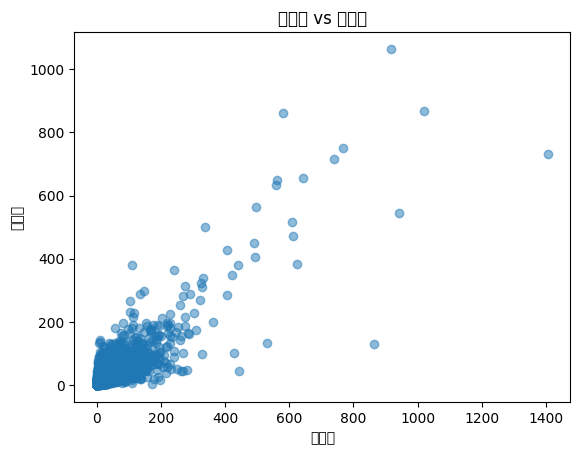

In [11]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.xlabel("實際值")
plt.ylabel("預測值")
plt.title("實際值 vs 預測值")
plt.show()

In [12]:
import pandas as pd

feature_importances = best_model.feature_importances_
features = pd.DataFrame({'特徵': X.columns, '重要性': feature_importances})
features.sort_values(by='重要性', ascending=False, inplace=True)
print(features)

                            特徵       重要性
0  air_quality_Carbon_Monoxide  0.605741
2          temperature_celsius  0.177668
1            air_quality_Ozone  0.129207
3                     humidity  0.087385
